# Image UNet interactive training

Notebook to allow interactive training/debugging and data exploration.

TODO:

- validation scoring in training.
- input pipeline grabbing random samples of limited size. 
- make network easier to parameterize by depth.  (done)

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from imageseg.img_util import load_and_clean_indices
from imageseg.network import kerasUNetLinear

from tensorflow.keras import backend as K

2023-08-14 21:56:58.391126: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1 Physical GPUs, 1 Logical GPUs


2023-08-14 21:56:59.762149: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-14 21:56:59.765007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-14 21:56:59.765678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-14 21:56:59.766409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [2]:
K.clear_session()

In [3]:
index_df, object_df = load_and_clean_indices()

Iter 0, Width bounds: 0, 320, Height bounds: 0, 240
Iter 1, Width bounds: 320, 640, Height bounds: 240, 480
Iter 2, Width bounds: 640, 1600, Height bounds: 480, 1200
Iter 3, Width bounds: 1600, 3200, Height bounds: 1200, 2400
Iter 4, Width bounds: 3200, 20000, Height bounds: 2400, 10000


In [4]:
#index_df.tail()
#object_df.sort_values("image_count", ascending=False).dropna()[:20]

In [5]:
UNet = kerasUNetLinear(index_df, object_df)

0
1
2
2
1
0


In [6]:
#from tensorflow.keras.utils import plot_model

In [7]:
#plot_model(UNet.model)

In [8]:
#UNet.model.summary()

In [10]:
#tf.debugging.disable_traceback_filtering()

In [9]:
%pdb off
UNet.train_network()

Automatic pdb calling has been turned OFF
Epoch 1/5


2023-08-14 21:57:14.095058: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/Down1_Dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-08-14 21:57:15.653565: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-08-14 21:57:16.394198: W tensorflow/tsl/framework/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
2023-08-14 21:57:16.693997: I tensorflow/compiler/xla/service/service.cc:17

2903/2903 [==============================] - 370s 123ms/step - loss: 0.4909 - IOU: 0.0351 - val_loss: 0.3173 - val_IOU: 0.0448
Epoch 2/5
2903/2903 [==============================] - 349s 120ms/step - loss: 0.3507 - IOU: 0.0481 - val_loss: 0.3597 - val_IOU: 0.0391
Epoch 3/5
2464/2903 [========================>.....] - ETA: 47s - loss: 0.3407 - IOU: 0.0542

KeyboardInterrupt: 

In [36]:
%pdb off

Automatic pdb calling has been turned OFF


- need to test the metric functions.  
- try using larger windows, more downsampling.  
- need to include some validation / holdout. have 5 folds 
- how to handle memory size?  some cleverness on final layers?  

1/1 [==============================] - 0s 191ms/step


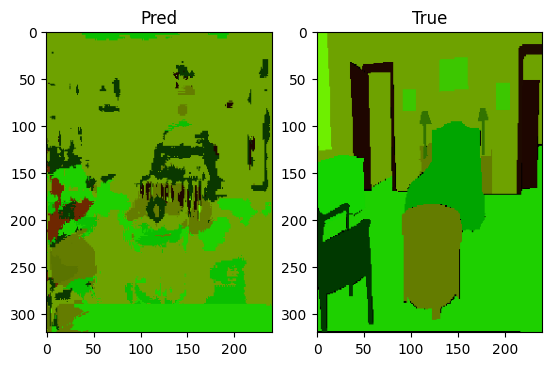

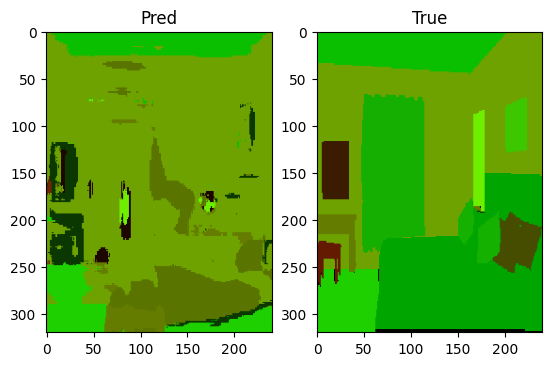

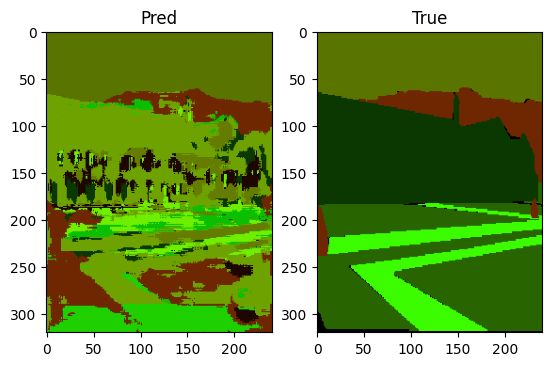

In [12]:
Ntry=3
bucket=0
indx = UNet.train_dict[bucket][:Ntry]
pred, batch, y = UNet.predict_afew(indx, size_bucket=bucket)
pred2 = UNet.get_most_likely(pred)
for i in range(Ntry):
    UNet.compare_pred_images(pred2, y, i)

In [21]:
pred.argmax(axis=3)

array([[[ 9,  9,  9, ...,  9,  9,  9],
        [ 9,  9,  9, ...,  9,  9,  9],
        [ 9,  9,  9, ...,  9,  9,  9],
        ...,
        [ 9,  9,  9, ..., 23, 23, 23],
        [ 9,  9,  9, ..., 23, 23, 23],
        [ 9,  9,  9, ..., 23, 23, 23]],

       [[ 9,  9,  9, ...,  9,  9,  9],
        [ 9,  9,  9, ...,  9,  9,  9],
        [ 9,  9,  9, ...,  9,  9,  9],
        ...,
        [ 9,  9,  9, ...,  9,  9,  9],
        [ 9,  9,  9, ...,  9,  9,  9],
        [ 9,  9,  9, ...,  9,  9,  9]],

       [[ 9,  9,  9, ...,  9,  9,  9],
        [ 9,  9,  9, ...,  9,  9,  9],
        [ 9,  9,  9, ...,  9,  9,  9],
        ...,
        [ 9,  9,  9, ...,  9,  9,  9],
        [ 9,  9,  9, ...,  9,  9,  9],
        [ 9,  9,  9, ...,  9,  9,  9]]])

In [28]:
np.mean(pred2  == y )

0.0379369212962963

- Turn off debug messages
- Figure out how to release GPU memory. 

# Binary Encoding

We have lots of categories here.  It would be nice to expand those.

How well can we train a network to output those labels?
Could also grab and train on smaller sub-sections of larger images.

Lets start with some fake data.

In [38]:
A = np.array([[1],[5], [8], [20],[1024]]).astype(np.uint8)

In [91]:
A = np.arange(1, 1001).reshape(1000, 1).astype(np.uint8)

In [ ]:
np.unpackbits(np.array([[0,1,4,7]],np.uint8)).reshape(-1,8)[:,4:]   